In [120]:
import pandas as pd
import matplotlib.pyplot as plt
df_fitness_original = pd.read_csv("../data/smart_fitness_&_nutrition_analytics.csv")

Exploracion inicial del dataset

In [135]:
#vamos a ver 5 samples para ver con que vamos a trabajar
df_fitness_original.sample(5)
#vamos a ver el numero de filar y columnas para hacernos unas ideas iniciales, como por ejemplo que hay datos de 20000 personas
#print(df_fitness_original.shape)
#vamos a ver las columnas de esta manera para verlas todas ya que son muchas y de esta manera se puede destruccar y  scrollear
#for i in df_fitness_original:
#	print(i)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
4529,48.99,Male,44.24,1.65,188.79,133.09,74.10,1.16,834.50,Yoga,...,2127.93,0.502178,2.391049,0.514343,0.704963,342.50,34.912440,834.1560,1.077647e+20,High
10740,25.82,Female,51.70,2.00,173.00,133.04,54.18,0.75,908.32,HIIT,...,1720.96,0.498629,1.676015,0.663693,0.769017,470.68,41.649570,535.8600,1.022374e+20,High
12460,18.90,Female,65.64,1.58,169.85,120.92,57.05,1.46,1051.20,Yoga,...,1602.31,0.496683,1.220902,0.566223,0.711922,694.80,48.632643,964.0380,5.368706e+19,Low
18093,45.41,Male,58.34,1.72,193.93,150.05,65.15,1.31,1727.76,HIIT,...,1562.75,0.500144,1.353103,0.659264,0.773733,-23.76,45.167065,878.5384,6.095127e+19,Low
2673,28.97,Male,54.78,1.52,171.95,122.70,71.75,1.48,1789.17,HIIT,...,1501.02,0.502298,1.353231,0.508483,0.713580,5.83,40.210650,1057.8448,1.025652e+20,High


Limpieza inicial del dataset

In [122]:
#lo primero que voy a hacer es cambiar los nombres de las columnas para dejarlos en minusculas y cambiar weight(kg) por weight_gk, lo mismo con lo otros que tengan parentesis
#ya que creo que es mas facil y viable de utilizar de esta manera
new_name = ""
df_fitness = df_fitness_original
for i in df_fitness_original:
	#pones todo en minusculas
	new_name = i.lower()
	#cambiamos los espacios por barras bajas
	new_name = new_name.replace(" ", "_")
	#quitamos los parentesis
	new_name = new_name.replace("(", "")
	new_name = new_name.replace(")", "")
	df_fitness = df_fitness.rename(columns = {i: new_name})
#ahora quiero quitar las mayusculas a todos los valores por el mismo motivo, mas facilidad de usar
#recorremos el data frame sacando el nombre de las columnas como column
for column in df_fitness:
	#recorremos los indices, para ello sacamos cuantas filas hay para usarlo como recorrido, en este caso del 0 al 19999, y usamos index como el indice
	for index in range(df_fitness.shape[0]):
		#hay valores que son string y otros que no, asi que usamos este if para cambiar solamente los valores string
		if type(df_fitness.at[index, column]) == str:
			#usamos el index y el column para sacar el valor, y lo guardamos en el mismo sitio pero con lower para quitar las mayusculas
			df_fitness.at[index, column] = df_fitness.at[index, column].lower()
#vamos a cambiar la edad para que sean enteros, ya que va a poder ser un estudio mas facil y no creo que sea interesante decir que una persona tiene 34 años y medio
df_fitness['age'] = df_fitness['age'].astype(int)
#para este caso de estudio voy a pasar fat_percentage a int, ya que si no vamos a tener una divercidad demasiado grande con tantos decimales
df_fitness['fat_percentage'] = df_fitness['fat_percentage'].astype(int)
df_fitness.head()

,age,gender,weight_kg,height_m,max_bpm,avg_bpm,resting_bpm,session_duration_hours,calories_burned,workout_type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_hrr,pct_maxhr,cal_balance,lean_mass_kg,expected_burn,burns_calories_per_30_min_bc,burns_calories_bin
0,34,male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,medium
1,23,female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,hiit,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,high
2,33,female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,high
3,38,female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,hiit,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,high
4,45,male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,low


Vamos a observar que para este estudio tenemos datos de hombres y mujeres, en este caso casi la misma cantidad para cada uno de los generos

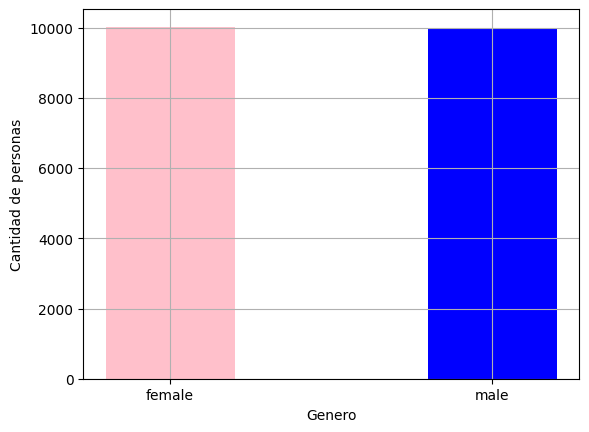

In [123]:
#contamos el numero de hombres y mujeres
count = df_fitness["gender"].value_counts()
plt.grid()
plt.bar(
  	["female", "male"],
    [count["female"], count["male"]],
    width = 0.4,
  	color = ["pink", "blue"]
)
plt.xlabel("Genero")
plt.ylabel("Cantidad de personas")
plt.show()


Con la siguiente grafica podemos observar dos cosas, primero notamos que hay mayor cantidad de gente deportista en las personas de 18 años, segundo esto decae enormemente pasando a los 20 y con ello estabilizandose, es curioso ver este cambio tan radical de un ponto a otro y seria interesante el saber porque. Tambien se puede observar que hay muy pocas personas de 59 años que hagan deporte, quizas debido a la edad

(42,)


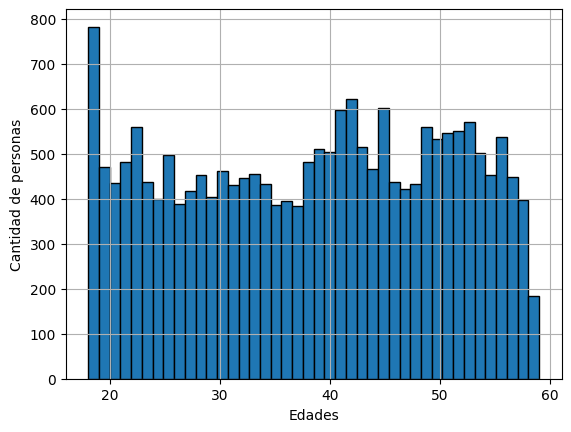

In [124]:
#con esto veo cuantos valores unicos de edades tengo, en este caso 42
print(df_fitness["age"].value_counts().shape)
plt.grid()
plt.hist(
    df_fitness["age"],
	bins = 42,
    edgecolor='black'
)
plt.xlabel("Edades")
plt.ylabel("Cantidad de personas")
plt.show()

Aqui podemos visualizar las edades segun genero, pero para este caso esta tambien igualado

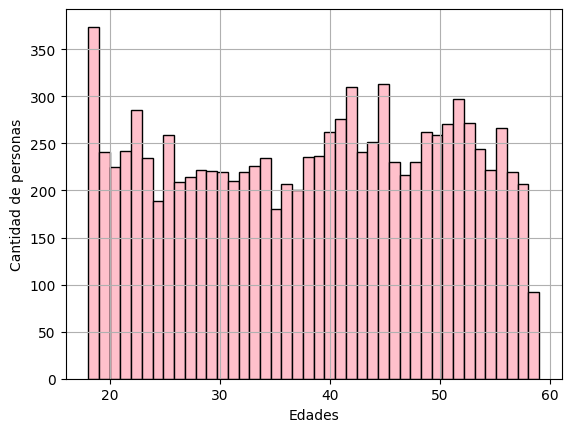

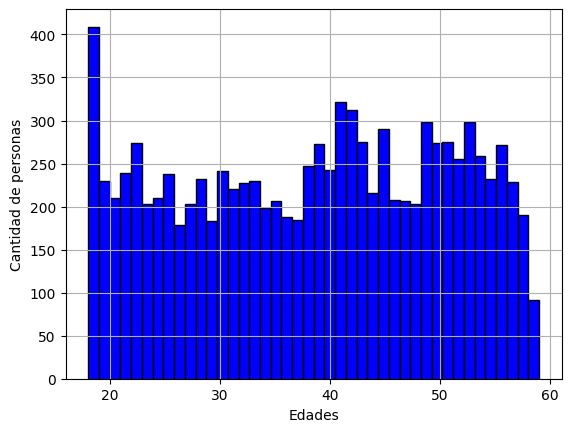

In [125]:
df_fitness_female = df_fitness[df_fitness["gender"] == "female"]
plt.grid()
plt.hist(
    df_fitness_female["age"],
	bins = 42,
    edgecolor='black',
	color = "pink"
)
plt.xlabel("Edades")
plt.ylabel("Cantidad de personas")
plt.show()
df_fitness_male = df_fitness[df_fitness["gender"] == "male"]
plt.grid()
plt.hist(
    df_fitness_male["age"],
	bins = 42,
    edgecolor='black',
	color = "blue"
)
plt.xlabel("Edades")
plt.ylabel("Cantidad de personas")
plt.show()

En esta grafica podemos ver que no hay nada relacionado de a mayor edad menos desportistas o cosas similares, pero si podemos ver que a lo largo de toda la vida hay deporte

<function matplotlib.pyplot.show(close=None, block=None)>

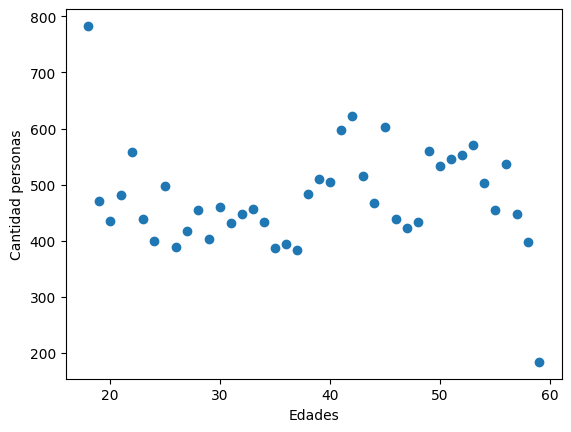

In [126]:
#aqui hago una lista con comprehesion list para guardar todas las cuentas de numero de personas  * edad
cantidad = [i for i in df_fitness["age"].value_counts().sort_index()]
#aqui hago una lista con comprehesion list con los numero del 18 al 60 para luego usarlo en la grafica, esto serian las edades
index = [i for i in range(18,60)]
plt.scatter(
  	index,
  	cantidad
)
plt.xlabel("Edades")
plt.ylabel("Cantidad personas")
plt.show

Tenemos aqui el porcentaje de grasa corporal que se tiene para tener un peso normal, sobrepeso o obesidad
*Hombres, Normal: 10-20, Sobrepeso: 20-25, Obesidad: >25 
*Mujeres, Normal: 20-30, Sobrepeso: 30-35, Obesidad: >35
Con ello en mente, podemos ver en las graficas, tanto de hombres como de mujeres, hay una gran cantidad de personas con obesidad, sobre todo hombres, ademas, en los hombres tambien tenemos muchas de personas con sobrepeso. Otro dato es que no hay nadie que este por debajo del 10% con lo cual no hay nadie que tenga un problema de desnutricion o similar

(25,)


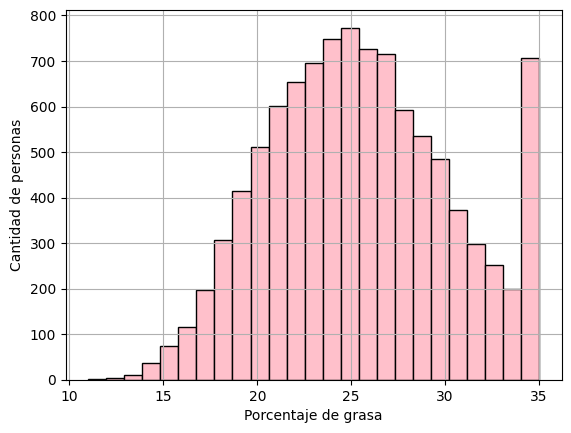

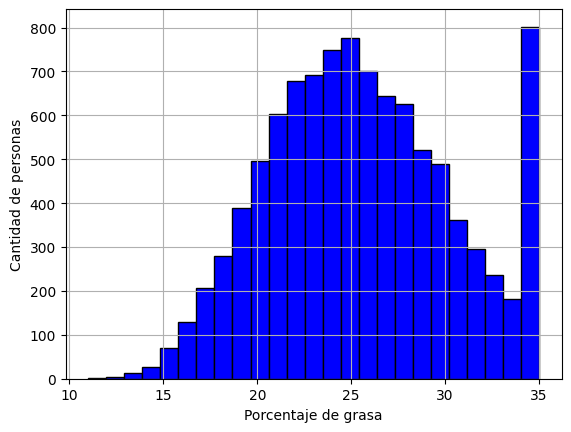

In [127]:
df_fitness["fat_percentage"].sort_values()
#con esto observo cuantos valores diferentes unicos tenemos, en este caso 25
print(df_fitness["fat_percentage"].value_counts().shape)
plt.grid()
plt.hist(
	df_fitness_female["fat_percentage"],
	bins = 25,
	edgecolor='black',
	color = "pink",
)
plt.xlabel("Porcentaje de grasa")
plt.ylabel("Cantidad de personas")
plt.show()
plt.grid()
plt.hist(
    df_fitness_male["fat_percentage"],
	bins = 25,
    edgecolor='black',
	color = "blue",
)
plt.xlabel("Porcentaje de grasa")
plt.ylabel("Cantidad de personas")
plt.show()


La cantidad maxima recomendada de azucar por dia es de Hombres: 36 gramos, Mujeres: 25 gramos. En las siguientes tablas podemos ver que cantidad de hombres y mujeres estan comiendo mas azucar diario del recomendado, siendo asi una de las posibilidades de por que hay tanto sobrepeso y obesidad en el caso de las mujeres

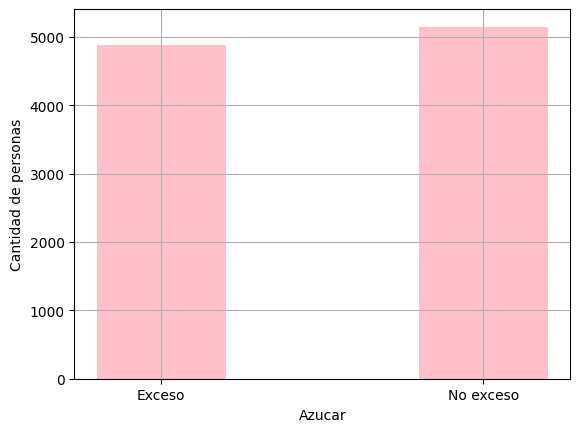

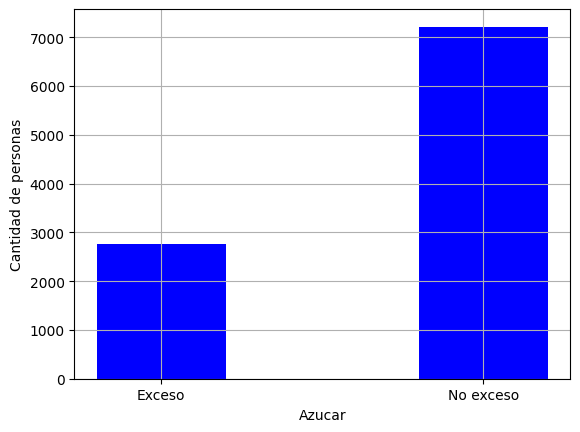

In [128]:
plt.grid()
plt.bar(
	["Exceso", "No exceso"],
	[df_fitness_female[df_fitness_female["sugar_g"] > 25].shape[0], df_fitness_female[df_fitness_female["sugar_g"] < 25].shape[0]],
  	width = 0.4,
	color = "pink"
)
plt.xlabel("Azucar")
plt.ylabel("Cantidad de personas")
plt.show()
plt.grid()
plt.bar(
	["Exceso", "No exceso"],
	[df_fitness_male[df_fitness_male["sugar_g"] > 36].shape[0], df_fitness_male[df_fitness_male["sugar_g"] < 36].shape[0]],
  	width = 0.4,
	color = "blue"
)
plt.xlabel("Azucar")
plt.ylabel("Cantidad de personas")
plt.show()

Una persona que hace deporte, como es en el 100% de las personas de este estudio, tiene que ingerir una cantidad concreta de hidratos de carbono diarios, para calcularlo seria 4g * pesokg = resultado en gramos de hidratos de carbono diarios, es decir, si tenemos una persona que pesa 75kg, 75 * 4 = 300, por tanto esa persona su valor ideal de hidratos de carbono al dia es de 300g. Con esto en mente, podemos ver a continuacion la cantidad de personas que tienen exceso de hidratos de carbono, por tanto, podria ser un motivo de ese sobrepeso y obesidad.

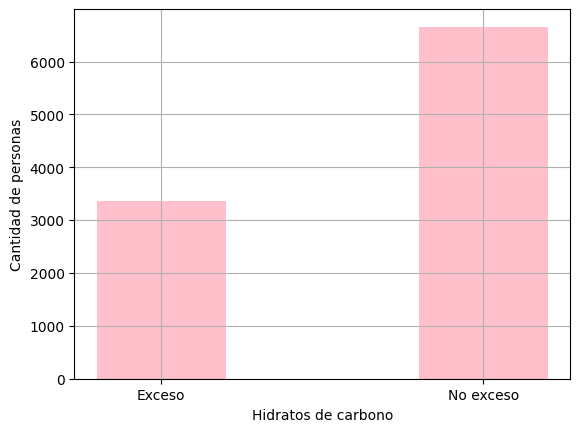

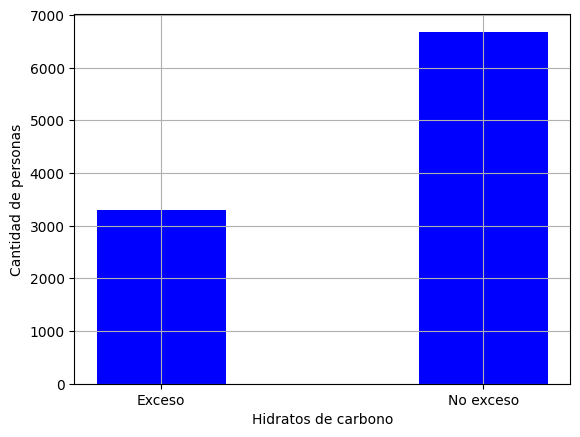

In [130]:
def carbohidratos_peso (df):
	'''
	esta funcion me calcula si una persona esta comiendo mas hidratos de carbono de lo que deberia segun su peso,
	devuelve dos variables que serian el numero de personas que tienen exceso y las que no,
	para ello, recibimos un dataframe, que luego recorreremos todas sus filas, axcediendo a su peso y sus hidratos de carbono diarios,
	una persona que hace deporte, como es en el 100% de las personas de este estudio, tiene que comer 4g * pesokg = resultado en gramos de hidratos de carbono diarios,
	entonces, si tenemos una persona que pesa 75kg, 75 * 4 = 300, por tanto esa persona su valor ideal de hidratos de carbono al dia es de 300g
	'''
	#declaro las dos variables para contabilizar el exceso
	exceso = 0
	no_exceso = 0
	#reseteo el index del dataframe para poder recorrerlo
	df = df.reset_index()
	#recorremos cada fila del dataframe usando el .shape[0] como longitud ya que son el numero de filas
	for index in range(df.shape[0]):
		#la condicion es, si come mas cantidad de hidratos de carbono de lo que deberia, tiene exceso
		#por tanto calculamos su cantidad siendo 4 * su peso
		if df.at[index, "carbs"] > (4 * df.at[index, "weight_kg"]):
			exceso += 1
		else:
			no_exceso += 1
	return exceso, no_exceso
#aqui guardamos la lista con los dos resultados de la cuenta
cuenta = carbohidratos_peso(df_fitness_female)
plt.grid()
plt.bar(
	["Exceso", "No exceso"],
	[cuenta[0], cuenta[1]],
  	width = 0.4,
	color = "pink"
)
plt.xlabel("Hidratos de carbono")
plt.ylabel("Cantidad de personas")
plt.show()
cuenta = carbohidratos_peso(df_fitness_male)
plt.grid()
plt.bar(
	["Exceso", "No exceso"],
	[cuenta[0], cuenta[1]],
  	width = 0.4,
	color = "blue"
)
plt.xlabel("Hidratos de carbono")
plt.ylabel("Cantidad de personas")
plt.show()